# Introduction

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

# Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## 1) EDA(Exploratory Data Analysis)

In [2]:
df1=pd.read_csv("train.csv",delimiter=";")
df2=pd.read_csv("test.csv",delimiter=";")

## Content

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

**train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)**

**test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv**

In [3]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df1.shape

(45211, 17)

In [6]:
df2.shape

(4521, 17)

### A) To check null/missing values

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

>There are no null values present in both datasets nut as ML model only works on numeric data we have to chnage the datatype  of the column required.

### B) Statistical Summary 

In [11]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### C) Showing graphs for each categorical variables

In [13]:
def plot_categorical_variable(data,name,figsize=(8,4),rotation=45):
    plt.figure(figsize=figsize)
    sns.set_theme(style="darkgrid")
    sns.countplot(x=data[name],data=data,hue="y")
    plt.xticks(rotation=rotation)
    plt.show()

Data Visualization for categorical variables

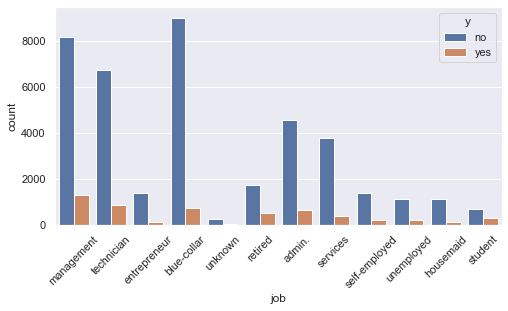

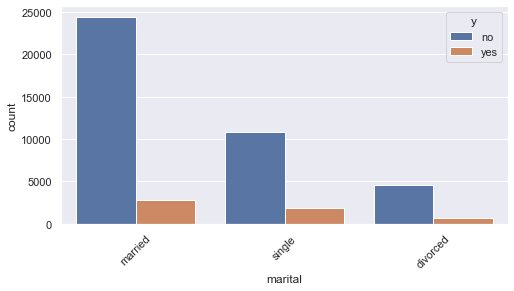

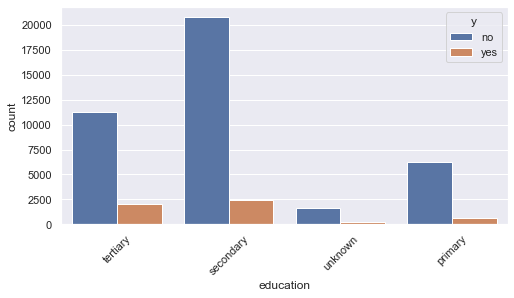

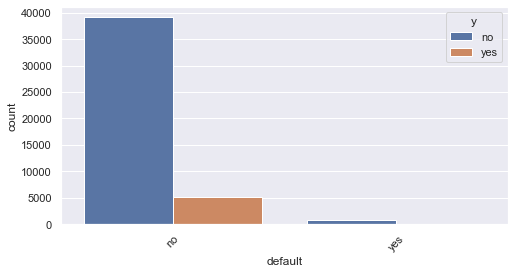

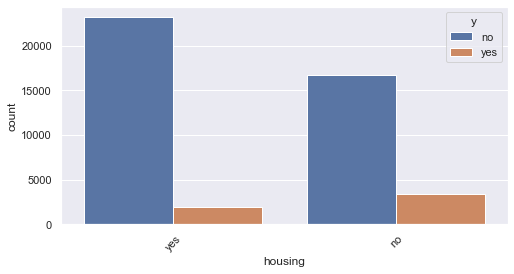

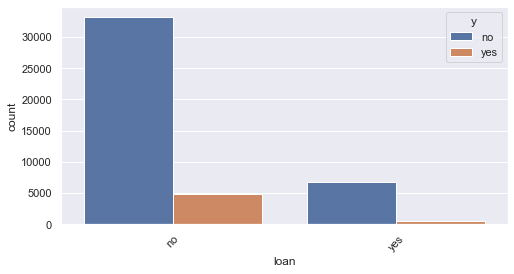

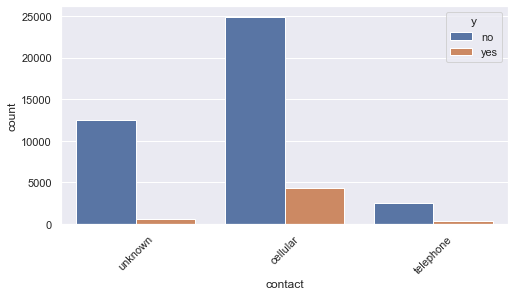

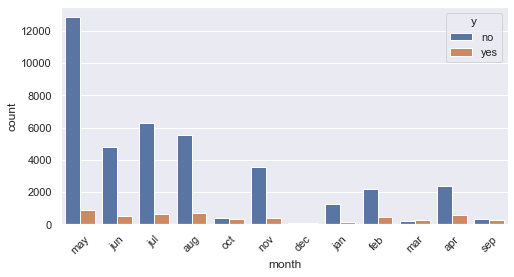

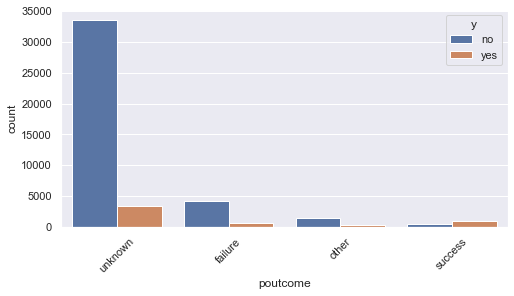

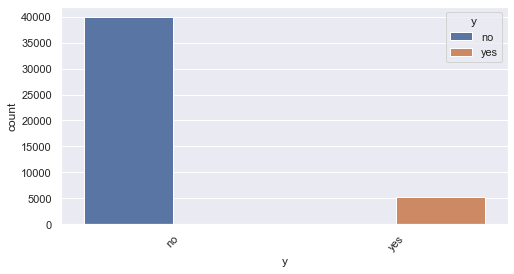

In [14]:
categorical=df1.select_dtypes(include=["object"]).columns.values
for col in categorical:
    plot_categorical_variable(df1,col)

## 2) Preprocessing

>Clean the dataset by handling missing values and outliers (if any).

>Split the dataset into features (X) and the target variable (y).

>Encode categorical variables if necessary (e.g., label encoding to convert categorical or text data into numerical labels.).

### D) Drop columns

As there is no year information available so we are going to drop month and day columns

In [15]:
df1.drop(['day','month'],axis=1,inplace=True)
df2.drop(['day','month'],axis=1,inplace=True)

### E) Changing Data Type

Going to chnage 4 categorical variable data type as they have binary values (default,housing,loan,y)

In [16]:
for col in ['default','housing','loan','y']:
    df1[col].replace(['yes','no'],[1,0],inplace=True)
    df2[col].replace(['yes','no'],[1,0],inplace=True)

In [17]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0


In [18]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,1,-1,0,unknown,0


### F) Seperating categorical and numerical columns

We are going to treat categorical and numerical columns seprately 

In [19]:
num_cols=df1.select_dtypes(['int64','float64']).columns

In [20]:
num_cols

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

### g) Showing correlation using heatmap

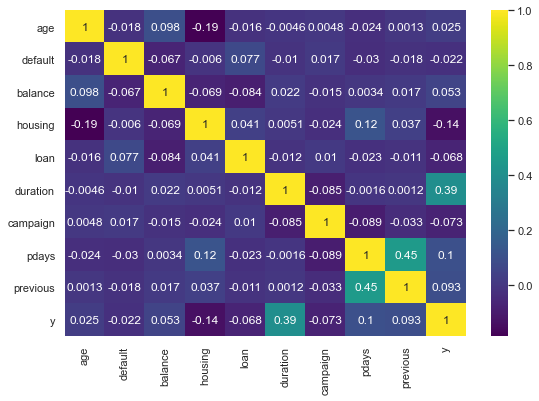

In [21]:
corr=df1.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

### Checking Skewness 

In [22]:
from scipy.stats import skew

In [23]:
skewness=df1[['age', 'balance', 'duration', 'campaign', 'previous']].skew()
skewness

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

In [24]:
def plot_histogram(data, name, bins=30, kde=True, figsize=(8,4)):
    plt.figure(figsize=figsize)
    sns.set_theme(style="darkgrid")
    sns.histplot(x=data[name], data=data, hue='y', kde=kde)
    plt.title("skweness of all numeric Columns")
    plt.show()

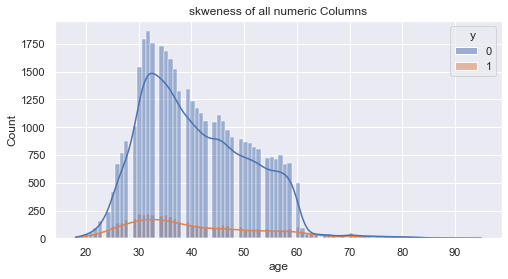

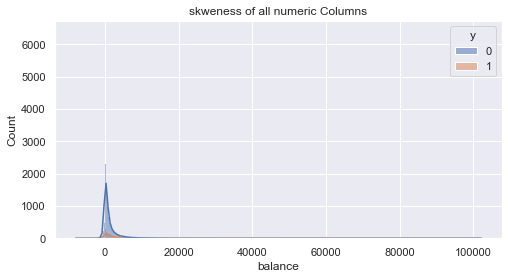

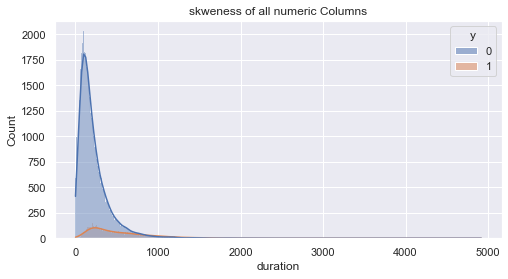

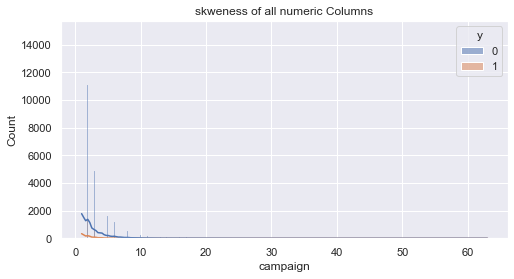

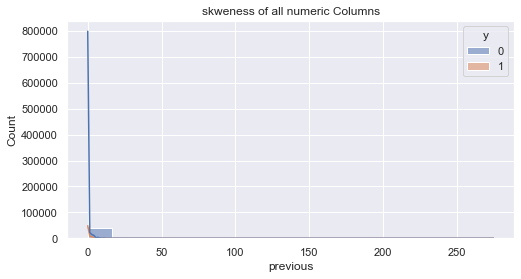

In [25]:
for col in['age', 'balance', 'duration', 'campaign', 'previous']:
    plot_histogram(df1,col)

> There is no skweness in the dataset so now we can separate our feature and target columns

### h) Separating Features and Target for both train and test dataset

In [26]:
x=df1.iloc[:,:-1]
y=df1["y"]

In [27]:
x1=df2.iloc[:,:-1]
y1=df2["y"]

In [28]:
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown


In [29]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,unknown
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure
3,30,management,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,153,1,-1,0,unknown
4518,57,technician,married,secondary,0,295,0,0,cellular,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,129,4,211,3,other


### i) Encoding

>We are going to use ordinal encoder to encode our data

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
oe=OrdinalEncoder()

In [32]:
#Train dataset
cat_col=x.select_dtypes(object).columns
cat_col

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [33]:
#Test dataset
cat_col1=x1.select_dtypes(object).columns
cat_col1

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [34]:
x[cat_col]

,job,marital,education,contact,poutcome
0,management,married,tertiary,unknown,unknown
1,technician,single,secondary,unknown,unknown
2,entrepreneur,married,secondary,unknown,unknown
3,blue-collar,married,unknown,unknown,unknown
4,unknown,single,unknown,unknown,unknown
...,...,...,...,...,...
45206,technician,married,tertiary,cellular,unknown
45207,retired,divorced,primary,cellular,unknown
45208,retired,married,secondary,cellular,success
45209,blue-collar,married,secondary,telephone,unknown


In [35]:
cat_col1

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [36]:
#Encoding columns using Ordinal encoder
x[cat_col]=oe.fit_transform(x[cat_col])
x1[cat_col1]=oe.transform(x1[cat_col1])

In [37]:
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0,2143,1,0,2.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0,29,1,0,2.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0,2,1,1,2.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0,1506,1,0,2.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0,1,0,0,2.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0,825,0,0,0.0,977,3,-1,0,3.0
45207,71,5.0,0.0,0.0,0,1729,0,0,0.0,456,2,-1,0,3.0
45208,72,5.0,1.0,1.0,0,5715,0,0,0.0,1127,5,184,3,2.0
45209,57,1.0,1.0,1.0,0,668,0,0,1.0,508,4,-1,0,3.0


In [38]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,2.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,2.0,226,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7.0,1.0,1.0,0,-333,1,0,0.0,329,5,-1,0,3.0
4517,57,6.0,1.0,2.0,1,-3313,1,1,2.0,153,1,-1,0,3.0
4518,57,9.0,1.0,1.0,0,295,0,0,0.0,151,11,-1,0,3.0
4519,28,1.0,1.0,1.0,0,1137,0,0,0.0,129,4,211,3,1.0


### j) Scaling

In [39]:
sc=StandardScaler()
x.iloc[:,:]=sc.fit_transform(x.iloc[:,:])
x1.iloc[:,:]=sc.transform(x1.iloc[:,:])

In [40]:
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,0.011016,-0.569351,-0.411453,-0.251940,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-0.416127,-0.569351,-0.411453,-0.251940,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-0.707361,-0.569351,-0.411453,-0.251940,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-0.645231,-0.569351,-0.411453,-0.251940,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-0.233620,-0.569351,-0.411453,-0.251940,0.444898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,-0.275762,1.036362,-0.13549,-0.176460,-1.118674,-0.436803,-0.713012,2.791329,0.076230,-0.411453,-0.251940,0.444898
45207,2.831227,0.201746,-1.919895,-1.637474,-0.13549,0.120447,-1.118674,-0.436803,-0.713012,0.768224,-0.246560,-0.411453,-0.251940,0.444898
45208,2.925401,0.201746,-0.275762,-0.300556,-0.13549,1.429593,-1.118674,-0.436803,-0.713012,3.373797,0.721811,1.436189,1.050473,-0.566175
45209,1.512791,-1.020516,-0.275762,-0.300556,-0.13549,-0.228024,-1.118674,-0.436803,0.400647,0.970146,0.399020,-0.411453,-0.251940,0.444898


In [41]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,-1.029906,1.729573,-0.275762,-1.637474,-0.135490,0.139496,-1.118674,-0.436803,-0.713012,-0.695712,-0.569351,-0.411453,-0.251940,0.444898
1,-0.747384,0.812877,-0.275762,-0.300556,-0.135490,1.125461,0.893915,2.289359,-0.713012,-0.148192,-0.569351,2.984213,1.484611,-2.588321
2,-0.559037,-0.103820,1.368372,1.036362,-0.135490,-0.004031,0.893915,-0.436803,-0.713012,-0.284101,-0.569351,2.894327,0.182198,-2.588321
3,-1.029906,-0.103820,-0.275762,1.036362,-0.135490,0.037352,0.893915,2.289359,1.514306,-0.229737,0.399020,-0.411453,-0.251940,0.444898
4,1.701139,-1.020516,-0.275762,-0.300556,-0.135490,-0.447419,0.893915,-0.436803,1.514306,-0.124893,-0.569351,-0.411453,-0.251940,0.444898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.747384,0.812877,-0.275762,-0.300556,-0.135490,-0.556789,0.893915,-0.436803,-0.713012,0.275068,0.721811,-0.411453,-0.251940,0.444898
4517,1.512791,0.507311,-0.275762,1.036362,7.380625,-1.535528,0.893915,2.289359,1.514306,-0.408361,-0.569351,-0.411453,-0.251940,0.444898
4518,1.512791,1.424008,-0.275762,-0.300556,-0.135490,-0.350531,-1.118674,-0.436803,-0.713012,-0.416127,2.658552,-0.411453,-0.251940,0.444898
4519,-1.218254,-1.020516,-0.275762,-0.300556,-0.135490,-0.073987,-1.118674,-0.436803,-0.713012,-0.501556,0.399020,1.705844,1.050473,-1.577248


In [42]:
x_train=x.iloc[:,:]
y_train=y
x_test=x1.iloc[:,:]
y_test=y1

## 3. Model Selection

In [43]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import auc,roc_curve,RocCurveDisplay

In [44]:
models=[]
models.append(LogisticRegression(solver="saga"))
models.append(KNeighborsClassifier())
models.append(SVC())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())
models.append(BaggingClassifier(KNeighborsClassifier()))
models.append(AdaBoostClassifier())
models.append(GradientBoostingClassifier())
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes','Bagging','AdaBoost','GradientBoosting']

In [45]:
models

[LogisticRegression(solver='saga'),
 KNeighborsClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GaussianNB(),
 BaggingClassifier(estimator=KNeighborsClassifier()),
 AdaBoostClassifier(),
 GradientBoostingClassifier()]

In [46]:
acc_list=[]
auc_list=[]
cm_list=[]

In [47]:
for model in models:
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test, ypred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, ypred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, ypred))

## 4)Evaluating

In [48]:
#Displaying Accuracy and AUC
result_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.887193,0.59
1,SVM,0.917054,0.71
2,KNN,0.905552,0.64
3,Decision Tree,1.000000,1.00
4,Random Forest,1.000000,1.00
5,Naive Bayes,0.834550,0.67
6,Bagging,0.918823,0.72
7,AdaBoost,0.893165,0.65
8,GradientBoosting,0.905994,0.68


>So we've build a model to solve our machine learning problem but we are getting maximum accuracy as 100 from decision tree and random Forest which leads to overfitting problem

>we will be using bagging classifier and will try to hyper tune to overcome this overfitting problem

In [49]:
bg=BaggingClassifier(RandomForestClassifier())
bg.fit(x_train, y_train)
ypred = bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4000
           1       0.98      0.79      0.88       521

    accuracy                           0.97      4521
   macro avg       0.98      0.89      0.93      4521
weighted avg       0.97      0.97      0.97      4521



In [50]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(x_train, y_train)
ypred = bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4000
           1       0.99      0.93      0.96       521

    accuracy                           0.99      4521
   macro avg       0.99      0.96      0.98      4521
weighted avg       0.99      0.99      0.99      4521



In [51]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(x_train, y_train)
ypred = bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.53      0.20      0.29       521

    accuracy                           0.89      4521
   macro avg       0.72      0.59      0.61      4521
weighted avg       0.86      0.89      0.86      4521



In [52]:
bg=BaggingClassifier(GaussianNB())
bg.fit(x_train, y_train)
ypred = bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4000
           1       0.34      0.46      0.39       521

    accuracy                           0.83      4521
   macro avg       0.63      0.67      0.65      4521
weighted avg       0.86      0.83      0.85      4521



In [53]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
ypred=gb.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4000
           1       0.65      0.39      0.49       521

    accuracy                           0.91      4521
   macro avg       0.79      0.68      0.72      4521
weighted avg       0.89      0.91      0.90      4521



In [54]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
ypred=xg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4000
           1       0.82      0.56      0.67       521

    accuracy                           0.93      4521
   macro avg       0.88      0.77      0.81      4521
weighted avg       0.93      0.93      0.93      4521



>Even after using bagging max accuracy we are getting is 99 from decision tree which is still not good

>As we are exhaused with all data source we be moving on to model hyperparameter tunning where we will try to adjust max_depth of the tree and will try to reduce the accuracy.

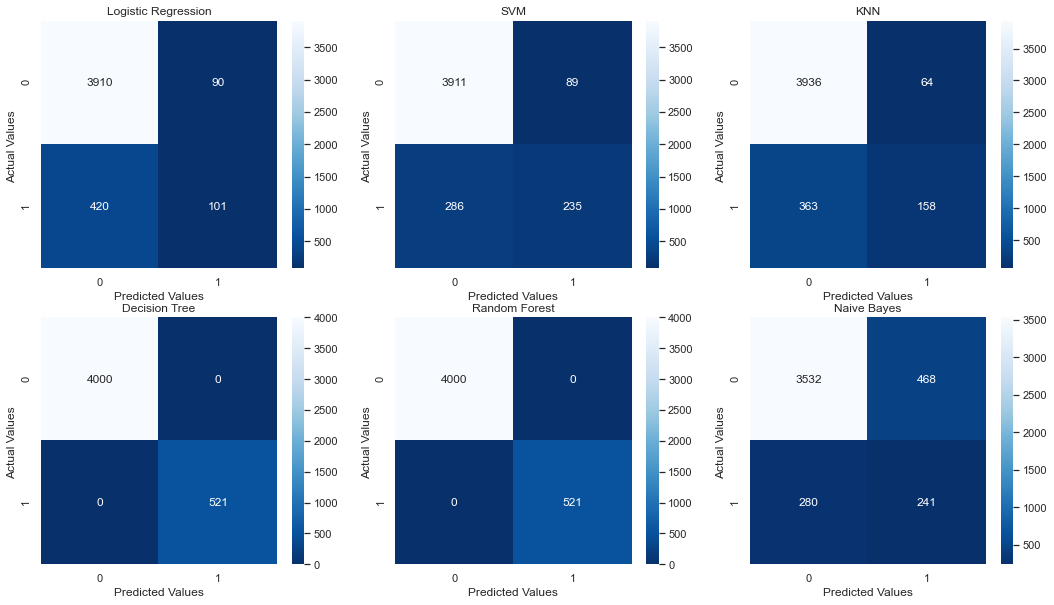

In [55]:
#Ploting Confusion Matrix

fig=plt.figure(figsize=(18,10))
for i in range(min(len(cm_list),6)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values ')

### Plotting ROC Curve

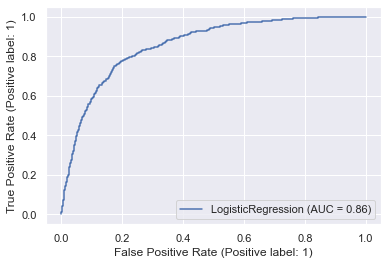

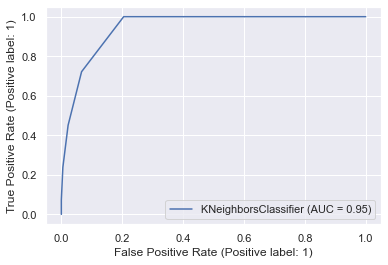

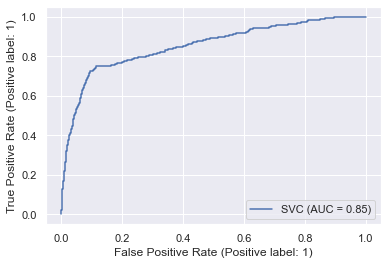

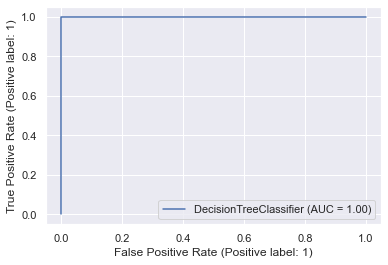

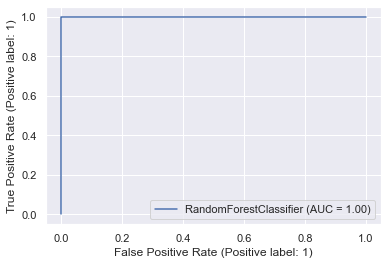

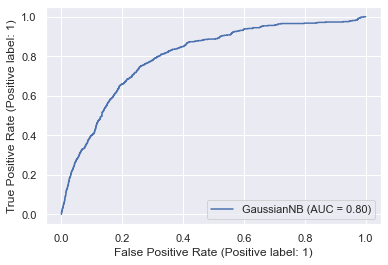

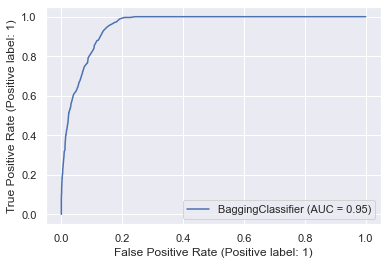

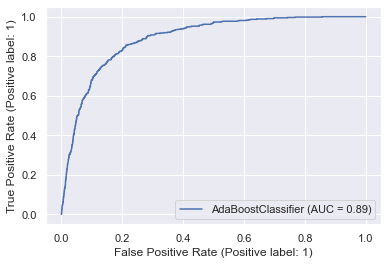

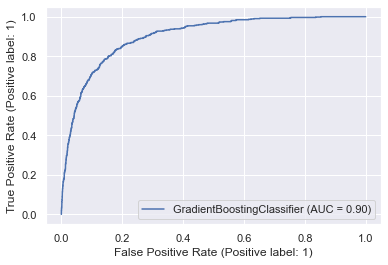

In [56]:
for model in models:
    RocCurveDisplay.from_estimator(model,x_test,y_test)

### Try to hypertune decision tree at max_depth

In [57]:
bg1=BaggingClassifier(DecisionTreeClassifier(max_depth=3))
bg1.fit(x_train,y_train)
ypred=bg1.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4000
           1       0.60      0.33      0.42       521

    accuracy                           0.90      4521
   macro avg       0.76      0.65      0.68      4521
weighted avg       0.88      0.90      0.88      4521



Extracting data and plotting decision tree

In [58]:
dt1=bg1.estimators_[0]

In [59]:
from sklearn.tree import plot_tree

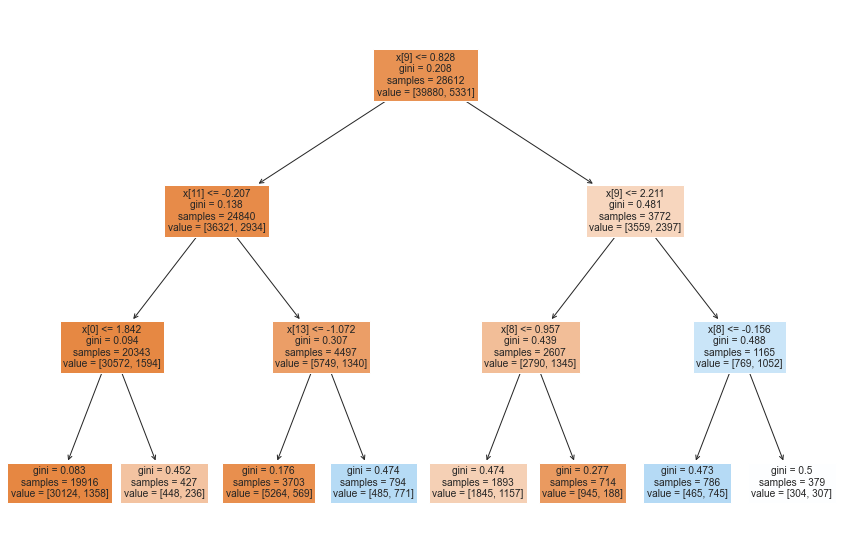

In [60]:
plt.figure(figsize=(15,10))
plot_tree(dt1,filled=True)
plt.show()

In [61]:
import pickle

In [62]:
pickle.dump(oe,open("Ordinalencoder.pkl","wb"))
pickle.dump(sc,open("StandardScaler.pkl","wb"))
pickle.dump(bg1,open("baggingclassifierdt.pkl","wb"))